In [193]:
import pandas 
import tensorflow  as tf
import matplotlib.pyplot as plt 
import numpy as np

#### MoveNet is an ultra fast and accurate model that detects 17 keypoints of a body. 

In [6]:
import kagglehub

# Download latest version
path = kagglehub.model_download("google/movenet/tfLite/singlepose-lightning")

print("Path to model files:", path)


  0%|                                                                                      | 0.00/8.94M [00:00<?, ?B/s]
 11%|████████▋                                                                     | 1.00M/8.94M [00:01<00:10, 776kB/s]
 22%|█████████████████▏                                                           | 2.00M/8.94M [00:01<00:04, 1.51MB/s]
 34%|█████████████████████████▊                                                   | 3.00M/8.94M [00:01<00:02, 2.39MB/s]
 45%|██████████████████████████████████▍                                          | 4.00M/8.94M [00:01<00:01, 3.11MB/s]
 67%|███████████████████████████████████████████████████▋                         | 6.00M/8.94M [00:02<00:00, 5.65MB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 8.94M/8.94M [00:02<00:00, 4.08MB/s]

Path to model files: C:\Users\godof\.cache\kagglehub\models\google\movenet\tfLite\singlepose-lightning\1


In [194]:
paths=r"3.tflite"
interpreter=tf.lite.Interpreter(model_path=paths)
interpreter.allocate_tensors()

### learn

In [98]:
interpreter.get_input_details()[0]

{'name': 'serving_default_input:0',
 'index': 0,
 'shape': array([  1, 192, 192,   3]),
 'shape_signature': array([  1, 192, 192,   3]),
 'dtype': numpy.float32,
 'quantization': (0.0, 0),
 'quantization_parameters': {'scales': array([], dtype=float32),
  'zero_points': array([], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

In [97]:
interpreter.get_input_details()[0]["index"]

0

In [211]:
import cv2
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    
    img=frame.copy()
    img=tf.image.resize_with_pad(np.expand_dims(img,axis=0),192,192)
    img=tf.cast(img,dtype=np.float32)#np.squeeze is a function in NumPy that removes single-dimensional entries from the shape of an array. 

    input=interpreter.get_input_details()
    output=interpreter.get_output_details()

    interpreter.set_tensor(input[0]['index'],np.array(img))
    interpreter.invoke()
    keypints_with_score=interpreter.get_tensor(output[0]['index'])

    
    drawkeypoint(frame,keypints_with_score,0.2)
    drawedges(frame,keypints_with_score,EDGES,0.2)
    
    
    cv2.imshow('Web Cam',frame)
    if cv2.waitKey(1)& 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [84]:
img.shape

(192, 192, 3)

In [ ]:
interpreter.get_tensor

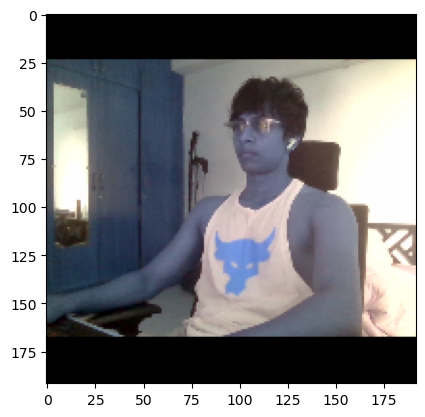

In [87]:
plt.imshow(img.astype(np.uint8))

In [133]:
right_eye=keypints_with_score[0][0][2]
right_eye[:2]*[480,640]

array([178.17076206, 357.59750366])

In [203]:
frame.shape

(480, 640, 3)

In [125]:
keypints_with_score[0][0]

array([[0.40468404, 0.57693195, 0.7126344 ],
       [0.3660123 , 0.61895514, 0.614806  ],
       [0.3711891 , 0.5587461 , 0.7486279 ],
       [0.3941936 , 0.69911903, 0.7322055 ],
       [0.3912886 , 0.5704992 , 0.6990984 ],
       [0.5500711 , 0.78693336, 0.60849595],
       [0.5507716 , 0.45717204, 0.66260815],
       [0.81050706, 0.8277518 , 0.40824175],
       [0.7162142 , 0.27119428, 0.6270665 ],
       [0.755514  , 0.6282948 , 0.09829225],
       [0.78659695, 0.02734856, 0.3975192 ],
       [0.8959079 , 0.6588633 , 0.09226061],
       [0.8896042 , 0.42220113, 0.21570294],
       [0.83662903, 0.65668267, 0.03656653],
       [0.8655242 , 0.27767074, 0.02216687],
       [0.79431844, 0.43775702, 0.04196978],
       [0.83775294, 0.01770234, 0.05578078]], dtype=float32)

This is why we use np.squeeze

In [181]:
a=np.squeeze(keypints_with_score[0][0])*[480,640,1]
shaped=np.array(tf.cast(a,dtype="int32"))

In [208]:
def drawkeypoint(frame,keypoints,confidence_thresh):
    y,x,c=frame.shape
    shaped=np.squeeze(np.multiply(keypoints,[y,x,1]))
    for i in shaped:
        y_cordinate,x_cordinate,conf= i
        if conf>confidence_thresh:
            cv2.circle(frame,(int(x_cordinate),int(y_cordinate)),4,(0,255,0),-3)
                #4,(0,255,0),-1 tells how big the circle is and which colour 

In [175]:
np.array(shaped[7][:2])# 7 is left elbow
# we  got coordiantes and confidence for elbow

array([389, 529])

In [196]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}


In [197]:
for edge,color in EDGES.items():
    p1,p2=edge
    print(p1,p2)
    y1,x1,c1=shaped[p1]
    y2,x2,c2=shaped[p2]
    print(y1,x1,c1,y2,x2,c2)
# shaped[0] aur shaped[1] kp join karna hai and similarly 0 aur 2 ko


0 1
224 24 0 201 53 0
0 2
224 24 0 204 18 0
1 3
201 53 0 216 114 0
2 4
204 18 0 211 16 0
0 5
224 24 0 316 207 0
0 6
224 24 0 306 13 0
5 7
316 207 0 350 227 0
7 9
350 227 0 274 113 0
6 8
306 13 0 414 15 0
8 10
414 15 0 305 17 0
5 6
316 207 0 306 13 0
5 11
316 207 0 233 20 0
6 12
306 13 0 441 17 0
11 12
233 20 0 441 17 0
11 13
233 20 0 402 16 0
13 15
402 16 0 406 21 0
12 14
441 17 0 400 5 0
14 16
400 5 0 232 7 0


In [207]:
def drawedges(frame,keypoints,edges,confidence_thresh):
    y,x,c=frame.shape
    shaped=np.squeeze(np.multiply(keypoints,[y,x,1]))

    for edge,color in edges.items():
        p1,p2=edge
        y1,x1,c1=shaped[p1]
        y2,x2,c2=shaped[p2]
        if (c1>confidence_thresh) &(c2>confidence_thresh):
                cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)